In [1]:
import pennylane as qml
from pennylane import numpy as np
from Ising_circuit_4qubits import Ising

import matplotlib.pyplot as plt

In [2]:
n_qubits = 4
dev = qml.device("default.qubit", wires = n_qubits)
@qml.qnode(dev)
def gs_circuit(h, subregion): #pass the subregion as an argument(don't include qubits you want to trace out)
    Ising(h)
    return qml.density_matrix(wires = subregion) 

# Warm up : two  qubits
Start with pairwise entanglement as a warmup but we know that the Hilbert space is not rich enough for BE anyways. For two qubits, PPT <=> separable. 

In [3]:
def PT_2qubits(rho): #pairwise PT ie between 2 qubits (recall in this case PPT = = separable )
    rho_ABC = rho.reshape(2,2,2,2) #iA iB, jA jB corresponds to 0,1,2,3
    rho_ABCPT = rho_ABC.transpose(2, 1, 0, 3)  #swapped iA and jA so im taking A | B partition
   
    rho_PT = rho_ABCPT.reshape(4,4)
    eigs = np.linalg.eigvalsh(rho_PT)

    if min(eigs) > -1e-8:
        print('PPT')
    
    log_neg = np.log2(np.sum(np.abs(eigs)))

    return eigs, log_neg

PPT


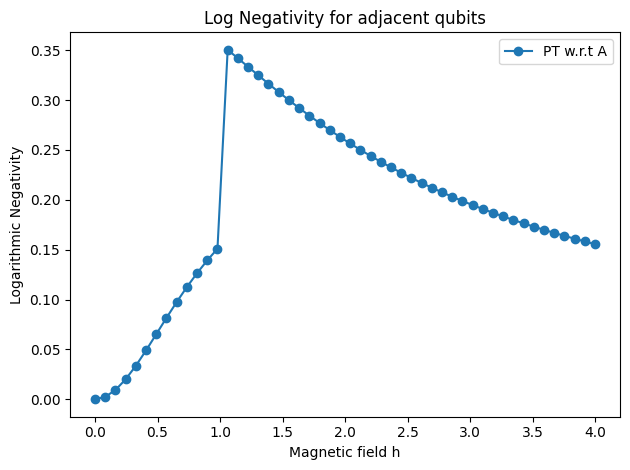

In [4]:
h_values = np.linspace(0, 4, 50)

ln_data = []
for h in h_values:
    rho = gs_circuit(h, [2, 3]) #gs_circuit(h, [0,1])  #gs_circuit(h, [1,2])   
    eigs, ln = PT_2qubits(rho)
    ln_data.append(ln)

plt.figure()
plt.plot(h_values, ln_data, label=f'PT w.r.t A', marker='o')

plt.xlabel('Magnetic field h')
plt.ylabel('Logarithmic Negativity')
plt.title('Log Negativity for adjacent qubits')
plt.legend()
plt.tight_layout()
plt.show()

PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT


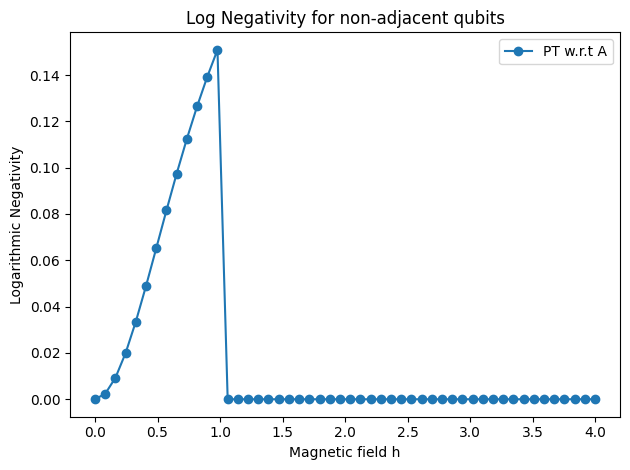

In [5]:
ln_data = []
for h in h_values:
    rho = gs_circuit(h, [0, 2]) #gs_circuit(h, [1,3])
    eigs, ln = PT_2qubits(rho)
    ln_data.append(ln)

plt.figure()
plt.plot(h_values, ln_data, label=f'PT w.r.t A', marker='o')

plt.xlabel('Magnetic field h')
plt.ylabel('Logarithmic Negativity')
plt.title('Log Negativity for non-adjacent qubits')
plt.legend()
plt.tight_layout()
plt.show()

So in the paramagnetic phase ($h > 0$) adjacent pairs are NPT but non-adjacent pairs are PPT. Does this existence of some NPT pairwise entanglement indicate just guarantee that there can be no bound entanglement?
Since isnt pairwise entanglement distillable by definition?

The question : Does BE requires all bipartitions and all two-party reductions to be PPT (non-distillable)? Then a single NPT bipartitions rules out BE?

## Three qubits
The intuition from Patanè et al 2007 New J. Phys. 9 322 is that we should check for incomplete separability. That is look for partitions of three qubits for which some partitions are separable and some are not separable. Then we should check all the partitions $A |BC $, $B |AC $ and $C | AB$. In the example below, we trace out the first qubit and then study the effect of the PT on $\rho_{ABC}$ for different partitions. (I find the same thing when I trace out another qubit though.)


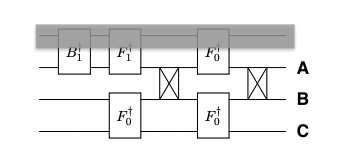

In [6]:
def incomplete_sep(rho, index): #or a PT for a three qubit system
    rho_ABC = rho.reshape(2,2,2,2,2,2) #iA iB iC, jA jB jC corresponds to 0,1,2,3,4,5
    if index == 'A':
        rho_ABCPT = rho_ABC.transpose(3, 1, 2, 0, 4, 5)  #swapped iA and jA so im taking A|BC
    elif index == 'B':
        rho_ABCPT = rho_ABC.transpose(0, 4, 2, 3, 1, 5) #swapped ib and jb so im taking AC|B
    elif index == 'C':
        rho_ABCPT = rho_ABC.transpose(0, 1, 5, 3, 4, 2) #swapped ic and jc so im taking AB|C
        
    rho_PT = rho_ABCPT.reshape(8,8)
    eigs = np.linalg.eigvalsh(rho_PT)

    if min(eigs) > -1e-8:
        print('PPT')
    
    log_neg = np.log2(np.sum(np.abs(eigs)))

    return eigs, log_neg

PPT
PPT
PPT


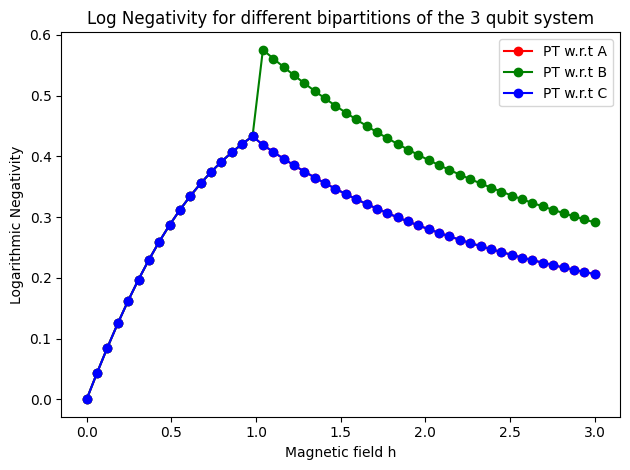

In [33]:
h_values = np.linspace(0, 3, 50)
ln_data = {'A': [], 'B': [], 'C': []}

for h in h_values:
    rho = gs_circuit(h, [0, 1, 2])  # density matrix of qubits [0, 1,2]
    for ind in ['A', 'B', 'C']:
        eigs, ln = incomplete_sep(rho, ind)
        ln_data[ind].append(ln)


plt.figure()
for ind, color in zip(['A', 'B', 'C'], ['r', 'g', 'b']):
    plt.plot(h_values, ln_data[ind], label=f'PT w.r.t {ind}', color=color, marker='o')

plt.xlabel('Magnetic field h')
plt.ylabel('Logarithmic Negativity')
plt.title('Log Negativity for different bipartitions of the 3 qubit system')
plt.legend()
plt.tight_layout()
plt.show()

#Seems intuitive from the circuit graph that the partition AC | B should have highest entanglement. Lots of 2 qubit gates cross it.
#why is there a discontinuity for AC |B  but not AB |C??
#I feel like we expect a discontinuity at all partitions? Maybe finite size effects

In [ ]:
# Ok I think for my small 4 qubit example, I see that the spin-spin correlations 